# Cass-Koopmans Optimal Growth Model 

Imports and set magics:

In [3]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Description of the model

## Cass-Koopman's Optimal Growth Model 

We're interested analysing the theoretically optimal level of optimal growth. To do so, we will be using Cass and Koopman's model of exactly that. 

The model can be interpreted as an extension of the Solow model but adapted to make the savings rate the outcome of an optimal choice. This is in contrast to that of the Solow model which assumed a constant savings rate determined outside the model. The model is based on the articles:

* Tjalling C. Koopmans. On the concept of optimal economic growth. In Tjalling C. Koopmans, editor, The Economic Approach to Development Planning, page 225–287. Chicago, 1965.

* David Cass. Optimum growth in an aggregative model of capital accumulation. Review of Economic Studies, 32(3):233–240, 1965.

## The model

Time is discrete and takes the values t=0,1...,T. A single good can be consumed or invested in physical capital. The consumption good is not durable and depreciates completely if not consumed. The capital good is durable but depreciates each period with rate $\gamma \epsilon (0,1)$. 

We consider the Cass-Koopmans model where:

* $C_t$ is a nondurable consumption good at time t.
* $K_t$ is is the stock of physical capital at time t.
* Let $C={C_0,...,C_T}$ and $K={K_1,...,K_{T+1}}$

A representative household is endowed with one unit of labour $N_t$ at each t, such that $N_t=1$ for all $t \epsilon [0,T]$. 

The representative household has preferences over consumption bundles ordered by the utility function: 

$$ U(C)=\sum_{T=0}^{T}\beta^t\frac{C_t^{1-\gamma}}{1-\gamma} $$

where $\beta \epsilon (0,1)$ is a disconut factor and $\gamma > 0$ governs the curvature of the one-period utility function. 

Note that

$$u(C_t)=\frac{C_t^{1-\gamma}}{1-\gamma}$$

satisfies $u'>0, u''<0$. 

Further note that
* $u'>0$ asserts the consumer prefers more to less
* $u''<0$ asserts that marginal utility declines with increases in $C_t$

We assume that $K_0>0$ is a given exogenous level of intial capital. 

There is an economy-wide production function: 

$$ F(K_t, N_t)=AK_t^\alpha N_t^{1-\alpha} $$

with 0 < \alpha < 1, A>0. 

A feasible allocation C, K satisfies
$$ C_t+K_t+1 \leq F(K_t,N_t)+(1-\delta)K_t,$$ 

for all $t \epsilon[0,T]$

where $\delta \epsilon(0,1)$ is a depreciation rate of capital. 


## Planning Problem

A planner chooses an allocation ${C,K}$, to maximise the utility function subject to the feasible allocation. Let $\mu ={\mu_0,...,\mu_T}$ be a sequence of nonnegative Lagrange multipliers. To find an optimal allocation, we use the Lagrangian

$$ L(C, K, \mu) = \sum_{t=1}^{T}\beta^t{\mu(C_t)+\mu_t(F(K_t, 1)+(1-\delta)K_t-C_t-K_{t+1})} $$

and then solve the following max problem

$$ max L(C,K, \mu) $$

**Useful Properties of Linearly Homogenous Production Function**

Notice that 

$$ F(K_t, N_t)=AK^\alpha_tN^{1-\alpha}_t=N_tA(\frac{K_t}{N_t})^\alpha $$

Define the output per-capital production function 

$$f(\frac{K_t}{N_t})=A(\frac{K_t}{N_t})^\alpha $$

whose argument is capital per-capita. 

Then we have that 

$$F(K_t,N_t)=N_tf(\frac{K_t}{N_t}) $$

Taking the derivate wrt K, yields

$$ \frac{\delta F}{\delta K} = \frac{\delta N_tf({\frac{K_t}{N_t})}}{\delta N_t} $$
$$ = N_tf'(\frac{K_t}{N_t}\frac{1}{N_t}) $$
$$ =f' (\frac{K_t}{N_t} \bigg\rvert_{N_t=1} $$
$$ f'(K_t) $$

Also

$$ \frac{\delta F}{\delta N} = \frac{\delta N_t f(\frac{K_t}{N_t})}{\delta N_t} $$
$$ = f(\frac{K_t}{N_t})+N_tf'(\frac{K_t}{N_t})-\frac{-K_t}{N_t^2}) $$
$$ = f(\frac{K_t}{N_t})- \frac{K_t}{N_t}f'(\frac{K_t}{N_t})\bigg\rvert_{N_t=1} $$
$$ = f(K_t)-f'(K_t)K_t $$

** Returning to solving the problem **

We compute first derivatives of Lagrangian and set them equal to 0, in order to solve the Lagrangian maximisation problem. 

Our objective function and constraints satisfy conditions that assure that the required SOCs are satisfied at an allocation satisfying the FOCs which that are derived below.

The FOC for maximisation with respet to C, K: 

$$ C_t: \mu'(C_t)=\mu_t = 0 for all t= 0,1,...,T $$
$$ K_t: \beta \mu_t[(1-\delta)+f'(K_t)]-\mu–{t-1}=0 for all t=1,2,...,T $$
$$ \mu_t:F(K_t,1)+(1-\delta)K_t-C_t-K_{t+1}=0 for all t=0,1,...,T $$ 
$$ K_{T+1}: -\mu_T 	\leq 0, 	\leq if K_{T+1}=0; =0 if K_{T+1} > 0 $$

In the equation for $C_t$ we plugged in for $\frac{\delta F}{\delta K}$ using the formula given above. As $N_t=1$ for all t=1,...,T, it is not necessary to differentiate with respect to those arguments. Note that the equation for $\mu_t$ comes from the occurrence of $K_t$ in both the period t and period t-1 feasibility constraints. The equation for $K_{T+1}$ comes from differentiating with respect to $K_{T+1}$ in the last period and applying the following Karush-Kuhn-Tucker condition: 

$$ \mu_tK_{T+1}=0 $$

Combining equations for $C_t$ and $K_t$ yields

$$ \mu'(C_t)[(1-\delta)+f'(K_t)]-\mu'(C{t-1})=0 $$ for all t=1,2,...,T+1

Rewriting yields 

$$ u'(C_{t+1})[(1-\delta)+f'(K_{t+1})]=\mu'(C_t) $$ for all t=0,1,...,T 

Taking the inverse of the utility function on both sides of the above equation yields 

$$ C_{t+1}=u'^{-1}((\frac{\beta}{u'(C_t)}[f'(K_{t+1})+(1- \delta)])^{-1}) $$ 

Or using the utility function.

$$ C_{t+1}=(\beta C^{\gamma}_t[f'(K_{t+1})+(1-\delta)])^{1/\gamma} $$
$$ =C_t(\beta[f'(K_{t+1})+(1-\delta)])^{1/\gamma} $$

The above FOC for consumption is an Euler Equation. It descirbes how consumption in consecuitive periods are optimally related to each other and to capital in the following period. 

We now apply the equations above to calculate variables and functions that we will need to solve the planning problem. 

First we define symbols

In [4]:
gamma = sm.symbols('gamma')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
beta = sm.symbols('beta')
A = sm.symbols('A')

And then define the functions needed to solve the model

In [5]:
# The utility function
def u(c, gamma): 
    if y == 1:  # if y = 1 we can with L'hopital's Rule show that the utility becomes log
        return np.log(c)
    else: 
        return (c**(1-gamma))/(1-gamma)

#The derivative of utility
def u_prime(c, gamma): 
    if gamma == 1:
        return 1/c
    else: 
        return c**(-gamma)

#The inverse utility
def u_prime_inverse(c, gamma):
    if gamma == 1: 
        return c
    else: 
        return c**(-1/gamma)

#The production function 
def f(A, k, alpha):
    return A*k**alpha

#The derivative of production function
def f_prime(A, k, alpha):
    return alpha*A*k**(alpha-1)

#The inverse production function
def f_prime_inverse(A, k, alpha):
    return (k/(A*alpha))**(1/(alpha-1))

We will be using for loops to derive an optimal allocation for C,K and an associated Lagrange multiplier sequence $\mu$. The FOCs for the planning problem, form a system of difference equations with two boundary conditions

* $K_0$ is a given initial condition for capital
* $K_{T+1}=0$ is a terminal condition for capital

The parameters are: 
* c = Initial consumption 
* k = Initial capital
* $\gamma$ = Relative risk aversion 
* $\delta$ = Capital depreciation rate
* $\beta$ = Discount factor
* $\alpha$ = per capita return to capital
* A = Technology level

** Next we define the model parameters **

In [6]:
gamma=2
delta=0.02
beta=0.95
alpha=0.33
A=1

We now use an algortihmic method to solve the problem and start by stating our intial guesses 

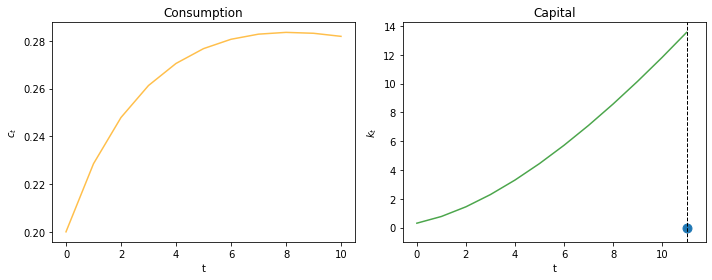

In [7]:
# Initial guesses
T=10
c=np.zeros(T+1) #T periods of consumption initialised to 0
k=np.zeros(T+2) #T periods of capital initialised to 0 (T+2 to include t+1 variable as too)
k[0]=0.3 #Initial level of   k
c[0]=0.2 #Initial guess of c_0

def algorithm(c, k, gamma, delta, beta, alpha, A):
    T = len(c)-1 
    for t in range(T): 
        k[t+1]=f(A=A, k=k[t], alpha=alpha)+(1-delta)*k[t]-c[t]
        if k[t+1]<0: #Ensuring nonnegativity
            k[t+1]=0 
        if beta*(f_prime(A=A, k=k[t+1], alpha=alpha)+(1-delta))==np.inf: 
#Occurs if k[t+1] is 0, meaning that we will not produce anything next period, thus consumption will go to 0
            c[t+1]=0
        else: c[t+1]=u_prime_inverse(u_prime(c=c[t], gamma=gamma)/(beta*(f_prime(A=A, k=k[t+1], alpha=alpha)+(1-delta))), gamma=gamma)


#Terminal condition calculation
    k[T+1]=f(A=A, k=k[T], alpha=alpha)+(1-delta)*k[T]-c[T]

    return c, k

paths = algorithm(c, k, gamma, delta, beta, alpha, A)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
colors = ['orange', 'green']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

for path, color, title, y, ax in zip(paths, colors, titles, ylabels, axes):
    ax.plot(path, c=color, alpha=0.7)
    ax.set(title=title, ylabel=y, xlabel='t')

ax.scatter(T+1, 0, s=80)
ax.axvline(T+1, color='k', ls='--', lw=1)

plt.tight_layout()
plt.show()

From the graphs above, it is evident that our guess for $\mu_0$ is too high and makes initial consumption too low. This is evident because the $K_{T+1}=0$ target is missing on the high side. 

## Bisection Method

In the following section we will automate the above procedure with the derivative-free method, Bisection. Applying the method means searching for $\mu_0$, stopping when we reach the target $K_{T+1}=0$. 


We take an initial guess for $C_0$ ($\mu_0$ can be eliminated because $C_0$ is an exact function of $\mu_0$. We know that the lowest $C_0$ can ever be is 0 and the largest it can be is initial output $f(K_0)$. We will take a guess on $C_0$ towards T+1. If $K_{T+1}>0$, let it be our new lower bound on $C_0$. If $K_{T+1}<0$, let it be our new upper bound. We will make a new guess for $C_0$ exactly halfway between our new upper and lower bounds. When $K_{T+1}$ gets close enough to 0 (wihtin some error tolerance bounds), the procedure will stop and we will have our values for consumption and capital.

More specifically the bisection methods in our model works in the following steps: 

1. We set $c_{low}=0$ and $c_{high}=f(k=k[0], alpha=alpha, A=A)$ where $f(c_{low})$ and $f(c_{high})$ have opposite sign, $f(c_{low})f(c_{high})<0$

2. We compute $C[0]$ where $C[0]=(c_{low}+c_{high})/2$ is the midpoint

3. The next sub-interval $[c_{low+1},c_{high+1}]$:

    - If $f(c_{low})f(C[0])<0$ (different signs) then $c_{low+1}=c_{low}$ and $c_{high+1}=C[0]$ (i.e. focus on the range $[c_{low},C[0]$)

    - If $fC[0]c_{high}<0$ (different signs) then $c_{low+1}=C[0]$ and $c_{high+1}=c_{high}$ (i.e. focus on the range $[C[0], c_{high}]$)
    
4. Steps 2 and 3 are then repeated until $f(C[0]_n)<\epsilon$

In [8]:
def bisection(c, k, gamma, delta, beta, alpha, A, tol=1e-4, max_iter=1e4, terminal=0): # Terminal is the value we are estimating towards

    #Step 1: Initialise
    T = len(c) - 1
    i = 1                                    # Initial iteration
    c_high = f(k=k[0], alpha=alpha, A=A)     # Initial high value of c
    c_low = 0                                # Initial low value of c

    path_c, path_k = algorithm(c, k, gamma, delta, beta, alpha, A)

    #Step 2-4: Main
    while (np.abs((path_k[T+1] - terminal)) > tol or path_k[T] == terminal) and i < max_iter:

        # Step 2: Midpoint and associated value
        c[0] = (c_high + c_low) / 2 
        path_c, path_k = algorithm(c, k, gamma, delta, beta, alpha, A)
     
        # Step 3: Determine sub-interval
        if path_k[T+1] - terminal > tol:
            # If assets are too high the c[0] we chose is a lower bound on possible values of c[0]
            c_low = c[0]
        elif path_k[T+1] - terminal < -tol:
            # If assets fell too quickly, the c[0] we chose is an upper bound on possible values of c[0]
            c_high=c[0]
        elif path_k[T] == terminal:
            # If assets fell too quickly, the c[0] we chose is now an uppernbound on possible values of c[0]
            c_high=c[0]

        i += 1  

    if np.abs(path_k[T+1] - terminal) < tol and path_k[T] != terminal:
        print('Bisection method successful. Converged on iteration', i-1)
    else:
        print('Bisection method failed')

    u = u_prime(c=path_c, gamma=gamma)
    return path_c, path_k, u

Plotting the results obtained in the above

Bisection method successful. Converged on iteration 20


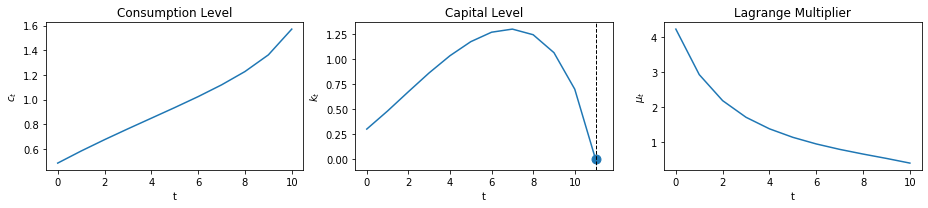

In [9]:
T = 10
c = np.zeros(T+1)
k = np.zeros(T+2) 

k[0] = 0.3 # Initial level of k
c[0] = 0.3 # Initial guess of c_0

paths = bisection(c, k, gamma, delta, beta, alpha, A)

def plot_paths(paths, axes=None, ss=None):

    T = len(paths[0])

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption Level', 'Capital Level', 'Lagrange Multiplier']

    for path, y, title, ax in zip(paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    #Plotting the steady state value of k
    if ss is not None:
        axes[1].axhline(ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, paths[1][-1], s=80)
    plt.tight_layout()

plot_paths(paths)

Evidently now, when our initial guess of $\mu_0$ is higher, we get a significantly different result. 

# Steady State Analysis

Setting inital level of capital to its steady state. 

If T $\rightarrow+ \infty$, the optimal allocation will converge to the steady state values of $C_t$ and $K_t$. We can derive these values and set $K_0$ equal to its steady state value. In a steady state we have that $K_{t+1}=K_t=\overline{K}$ for all large ts, the feasibility constraint previously stated is $f(\overline{K})-\delta\overline{K}=\overline{C}$ 

Substituting $K_t=\overline{K}$ and $C_t=\overline{C}$ for all t into the previously obtained equation $$u'(C_{t+1})[(1-\delta)+f'(K_{t+1})]= u'(C_t)$$ for all t=0,1,...,T, yields $$1=\beta\frac{u'(\overline{C}}{u'(\overline{C}}[f'(\overline{K}+(1-\delta)]$$. 

Defining $\beta=\frac{1}{1+\rho}$, and rearranging yields $$1+\rho=1[f'(\overline{K})+(1- \delta)]$$ 

We simplify the function, which yields the following results
$$f'(\overline{K})=\rho+\delta$$ and $$\overline{K}=f'^{-1}(\rho+\delta)$$ 

Plotting the obtained function into the previously stated production function yields $$\alpha\overline{K}^{\alpha-1}=\rho+\delta$$

Using the obtained values $\alpha$=0.33, $\rho=\frac{1}{\beta}-1=\frac{1}{\frac{19}{20}}-1=\frac{1}{19}$ and $\delta=\frac{1}{50}$, we get $$\overline{K}=(\frac{\frac{33}{100}}{\frac{1}{50}+\frac{1}{19}})^{\frac{67}{100}}≈9.6$$

In the below we will verify this result and use this steady state $\overline{K}$ as our initial capital stock $K_0$. 


In [10]:
rho = sm.symbols('rho')
rho=1/beta-1
k_ss=f_prime_inverse(k=rho+delta,A=A, alpha=alpha)
print(f'Steady state for capital is {k_ss}')

Steady state for capital is 9.57583816331462


** Plot: We are now at a stage where we can plot given the obtained values. **

Bisection method successful. Converged on iteration 38


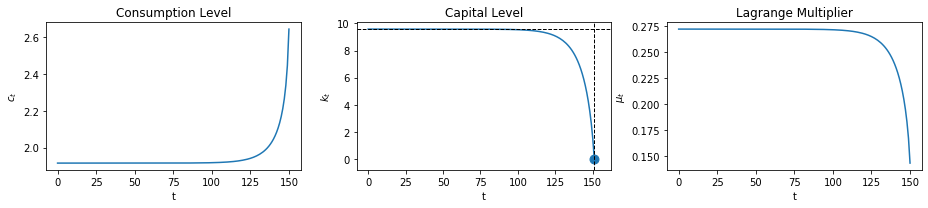

In [11]:
T=150
c=np.zeros(T+1)
k=np.zeros(T+2)
c[0]=0.3
k[0]=k_ss
paths = bisection(c, k, gamma, delta, beta, alpha, A)

plot_paths(paths, ss=k_ss)

From the plots obtained above we see that in this economy with a large value of $T$, $K_t$ will stay near its initial value for as long as possible. We can from this deduct that the social planner likes the steady state capital stock and wants to stay there for as long as possible.

## Changing the parameter values

### Changing the value of $K_0$ **

In the below we will look at what happens when the initial level of capital, $K_0$, is pushed below $\overline{K}$.

Bisection method successful. Converged on iteration 39


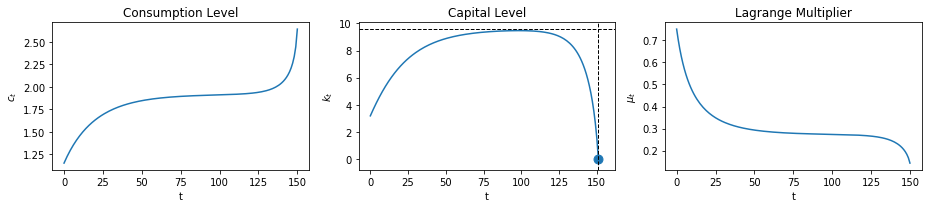

In [12]:
k_initial = k_ss/3 #A value below the steady state level
T=150
c=np.zeros(T+1)
k=np.zeros(T+2)
c[0]=0.3
k[0]=k_initial
paths = bisection(c, k, gamma, delta, beta, alpha, A)

plot_paths(paths, ss=k_ss)

We now see that the planner pushes capital toward the steady state value then stays at this value for a substantial amount of time and subsequently pushes $K_t$ toward the terminal value $K_{T+1}=0$ as t gets close to T. 

### Changing the value of the time horizon, T

We are also interested in seeing how the trajectory of the paths will change, when altering the value for T. We're making a list with four differet values of T in order to see the difference when the time horizon is altered within the same graphs. The values of T are ranging from 30 to 180 to incapsule a large range of Ts.

Bisection method successful. Converged on iteration 44
Bisection method successful. Converged on iteration 32
Bisection method successful. Converged on iteration 28
Bisection method successful. Converged on iteration 22


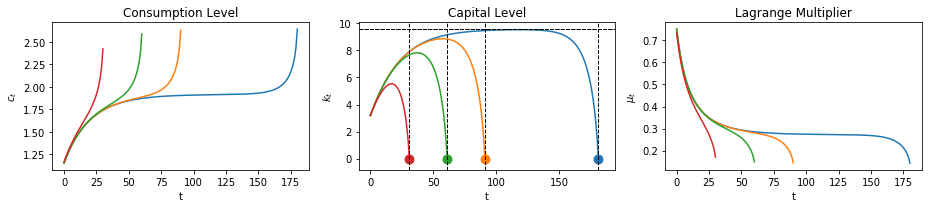

In [13]:
T_list = (180, 90, 60, 30)
fix, axes =plt.subplots(1, 3, figsize=(13,3))

for T in T_list:
    c=np.zeros(T+1)
    k=np.zeros(T+2)
    c[0]=0.3
    k[0]=k_initial
    paths=bisection(c, k, gamma, delta, beta, alpha, A)
    plot_paths(paths, ss=k_ss, axes=axes)


The different colours in the graphs above are tied to outcomes with different time horizons T. These are the values given in the T_list. 

We see that as we increase the time horizon, the planner puts $K_{t}$ closer to the steady state value $\overline{K}$ for longer. 

In the following we are testing what happens when we set the value of T at a very high value. We expect the planner making the capital stockspend most of its time close to its steady state level. 

Bisection method failed
Bisection method successful. Converged on iteration 44
Bisection method successful. Converged on iteration 28
Bisection method successful. Converged on iteration 22


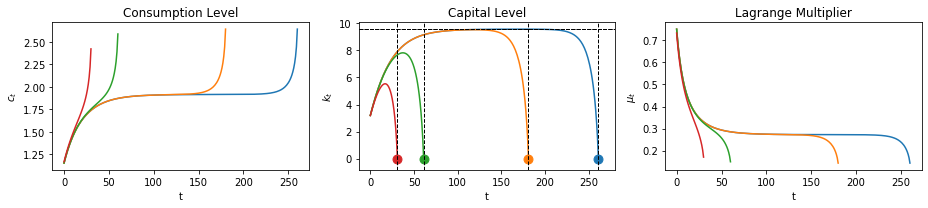

In [14]:
T_list = (260, 180, 60, 30)
fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_initial
    paths = bisection(c, k, gamma, delta, beta, alpha, A)
    plot_paths(paths, ss=k_ss, axes=axes)

Evidently the bisection method failed when the parameter for T is set to 260. It failed to converge and hit the maximum iteration.

However, it is evident that the pattern from the previous analysis is repeated with the increased values of T. The pattern reflects a turnpike property of the steady state. 

We can conclude that for any given initial value of $K_0$, $K_t$ is pushed toward the steady state and held at this level for as long as possible. 

# Further analysis

In the below we extend the Cass-Koopman's model of optimal growth by adding an environmental term with inspiration from a paper done by Luiz Fernando (Luiz Fernando Ohara Kamogawa & Ricardo Shirota, 2011. "Economic growth, energyconsumption and emissions: an extension of Ramsey-Cass-Koopmans modelunder EKC hypothesis," Anais do XXXVII Encontro Nacional de Economia [Proceedings of the 37th Brazilian Economics Meeting] 187, ANPEC)

The production function remains unchanged, but new parameters changes the utility function. The parameters are:
* $\eta$ = relative $CO_2$-emission done by non-renewable energy compared to renewable energy
* $\Phi$ = means of the gloabl awareness of climate changes
* $j$ = substitutability from non-renewable energy to renewable energy.



The utility function is then given by: 
$$U=c^{-\gamma}-\eta*\Phi^j$$



** First we define the new symbols **

In [16]:
epsilon = sm.symbols('epsilon')
theta = sm.symbols('theta')

** Then we define the new function of utility needed to solve the extended model **

In [17]:
#The derivative of environmental utility
def u_prime(c, gamma, epsilon, theta, j): 
    if gamma == 1:
        return 1/c
    else: 
        return c**(-gamma)-epsilon*(theta)**j

#The inverse environmental utility
def u_prime_inverse(c, gamma, epsilon, theta, j):
    if gamma == 1: 
        return c
    else: 
        return c**(-1/gamma)-epsilon*(theta)**(1/j)

** Adding the new model parameters **

The values of the terms added is based on the empirical findings in Fernando's (2011) paper.

In [18]:
#New parameters
epsilon=0.5
theta=0.03
j=0.5

In [19]:
def bisection(c, k, gamma, delta, beta, alpha, A, tol=1e-4, max_iter=1e4, terminal=0): 

    #Step 1: Initialise
    T = len(c) - 1
    i = 1                                    # Initial iteration
    c_high = f(k=k[0], alpha=alpha, A=A)     # Initial high value of c
    c_low = 0                                # Initial low value of c

    path_c, path_k = algorithm(c, k, gamma, delta, beta, alpha, A)

    #Step 2-4: Main
    while (np.abs((path_k[T+1] - terminal)) > tol or path_k[T] == terminal) and i < max_iter:

        # Step 2: Midpoint and associated value
        c[0] = (c_high + c_low) / 2 
        path_c, path_k = algorithm(c, k, gamma, delta, beta, alpha, A)
     
        # Step 3: Determine sub-interval
        if path_k[T+1] - terminal > tol:
            c_low = c[0]
        elif path_k[T+1] - terminal < -tol:
            c_high=c[0]
        elif path_k[T] == terminal:
            c_high=c[0]

        i += 1  

    if np.abs(path_k[T+1] - terminal) < tol and path_k[T] != terminal:
        print('Bisection method successful. Converged on iteration', i-1)
    else:
        print('Bisection method failed')

    u = u_prime(c=path_c, gamma=gamma, epsilon=epsilon, theta=theta, j=j)
    return path_c, path_k, u

T = 10
c = np.zeros(T+1) 
k = np.zeros(T+2)

k[0] = 0.3 # Initial  k
c[0] = 0.3 # Initial guess of c_0

paths = bisection(c, k, gamma, delta, beta, alpha, A)

def plot_paths(paths, axes=None, ss=None):

    T = len(paths[0])

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    for path, y, title, ax in zip(paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    #Plotting the steady state value of k
    if ss is not None:
        axes[1].axhline(ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, paths[1][-1], s=80)
    plt.tight_layout()

plot_paths(paths)

TypeError: u_prime() missing 3 required positional arguments: 'epsilon', 'theta', and 'j'

** We repeat the bisection method with the environmental extension **

The optimal consumption path has evidently changed quite radically after having added the environmental terms. The path of consumption increased up until t=3 and decreased afterwards.

# Conclusion

We used a algorithmic and bisection method to solve cass-koopman model for optimal growth. The optimal growth path for consumption is found to be rise over the whole time period while the path for capital rise until steady state is achieved then fall to zero at the end of the time period. The steady state for capital is found to be 9.58. In the next step we did a graphically visualization of the optimal consumption and capital path with different time horizons, we found evidence that the time period has to be larger than 150 years to be in the steady state path. At last we analyzed an extension to the baseline model, we added an environmental term to the utility function. The new environmental growth model had a concave consumption path and an ever increasing capital path.